In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [120]:
url_1 = 'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_demo.txt'
url_2 = 'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_experiment_clients.txt'
url_3 = 'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_1.txt'
url_4 = 'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_2.txt'

In [121]:
client_profile = pd.read_csv(url_1)
exp_client = pd.read_csv(url_2)

In [122]:
df_1 = pd.read_csv(url_3)
df_2 = pd.read_csv(url_4)

In [123]:
# Merge client profiles file (df_final_demo.txt) with experiment roster (df_final_experiment_clients.txt)

clients = pd.merge(client_profile, exp_client, on='client_id', how='outer')

In [124]:
# Cleaning 'clients' file:
# 1. Drop rows with NaN value in 'Variation' column - 20109 rows
# 2. Drop row with NaN value in 'gender' column - 12 rows
# 3. Drop rows with 'X' value in 'gender column' - 2 rows
# 4. Drop row with NaN value in 'age' column - 1 row

#1
# clients = clients.dropna(subset=['Variation']) 

clients['Variation'] = clients['Variation'].fillna('Unknown')

#2
clients = clients.dropna(subset=['gendr']) 

#3
clients.drop(clients[clients['gendr'] == 'X'].index, inplace=True)

#4
clients = clients.dropna(subset=['clnt_age']) 

In [125]:
# Concat Digital Footprints (df_final_web_data) pt_1 and pt_2 into one file:
df = pd.concat([df_1, df_2])

In [126]:
# Remove duplicated rows in merged digital footprints file 'df'
# df.duplicated().sum() - there are 10764 duplicated rows

df.drop_duplicates(inplace=True)

In [127]:
#Categorization of ages by bins of ages :

bin_edges = [0, 18, 25, 35, 45, 55, 65, float('inf')]
bin_labels = ['<18yrs', '18-25yrs', '25-35yrs', '35-45yrs', '45-55yrs', '55-65yrs', '>65yrs']
clients['age_bin'] = pd.cut(clients['clnt_age'], bins=bin_edges, labels=bin_labels, right=False)

In [128]:
#Categorization of balances by bins of balances :

bin_edges = [0, 25000, 50000, 100000, 250000, 500000, 1000000, float('inf')]
bin_labels = ['<25k$', '25-50k$', '50-100K$', '100-250K$', '250-500K$', '500K$-1M$', '>1M$']
clients['bal_bin'] = pd.cut(clients['bal'], bins=bin_edges, labels=bin_labels, right=False)

In [202]:
clients.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,age_bin,bal_bin
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,55-65yrs,25-50k$
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,55-65yrs,100-250K$
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test,25-35yrs,50-100K$
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test,45-55yrs,50-100K$
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control,25-35yrs,100-250K$


In [208]:
clients['gendr'].value_counts()

gendr
U    24122
M    23724
F    22745
Name: count, dtype: int64

In [209]:
pd.options.display.float_format = '{:.2f}'.format
clients.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,70591.00,70591.00,70591.00,70591.00,70591.00,70591.00,70591.00,70591.00
mean,5005066.31,12.05,150.66,46.44,2.26,147451.82,3.38,5.57
std,2877324.49,6.87,82.09,15.59,0.54,301515.98,2.24,2.35
min,169.00,2.00,33.00,13.50,1.00,13789.42,0.00,1.00
25%,2519604.50,6.00,82.00,32.50,2.00,37348.46,1.00,4.00
50%,5016978.00,11.00,136.00,47.00,2.00,63336.89,3.00,5.00
75%,7483160.00,16.00,192.00,59.00,2.00,137550.08,6.00,7.00
max,9999839.00,62.00,749.00,96.00,8.00,16320040.15,7.00,9.00




# General Customer Analysis

Here are the main characteristics of the customers engaged though the Online process: 
- Gender are balanced with a little more of men (51%) but we don't know the gender for 1/3 of the customers
- The average age of these customers is 46,4 years, very close to the median age of 47. 50% of the customers are between 35 and 60 years old. Nonetheless, the visualizations belows show that there are 2 peaks in the age (one around 30 years and another around 55)
- The client tenure is 12 years in average, a bit more thant the median of 11 years. 50% of the customers have a tenure between 6 and 16 years. The visualisations belows shows us that there is a important peak around 6-8 years, whereas the tenure are far more distributed above the mean. 
- The total balance of the customers have an average of 147k, very superior of the median balance of 63k. 50% of the customers have a balance between 37 ad 137k. The viz confirm that the balances are heavily right skewed, with a wide distribution of high balances and outliers of several millions balance. 
- The most represented customers are 25-35 years old customers with a balance between 25 and 50k

## General Visualizations

/Users/pierremenard/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


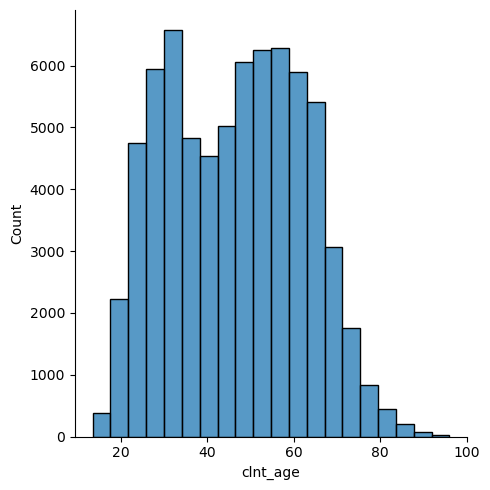

In [199]:
sns.displot(data=clients, x="clnt_age", bins=20)
plt.show()

/Users/pierremenard/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


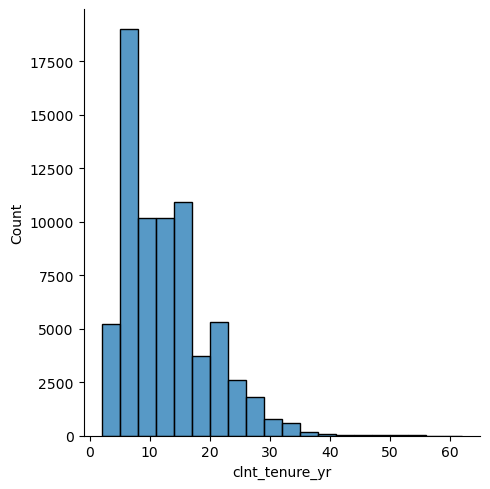

In [201]:
sns.displot(data=clients, x="clnt_tenure_yr", bins=20)
plt.show()

In [194]:
def remove_outliers(df, columns_to_parse, outlier_strictness = 1.5):
    
    for c in columns_to_parse:
        Q1 = df[c].quantile(0.25)
        Q3 = df[c].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - outlier_strictness * IQR
        upper_bound = Q3 + outlier_strictness * IQR

        df = df[(df[c] >= lower_bound) & (df[c] <= upper_bound)]

    return df

In [170]:
clients_copy = clients.copy()
clients_wo_bal_outliers = remove_outliers(clients_copy,['bal'],outlier_strictness = 1.5)

/Users/pierremenard/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


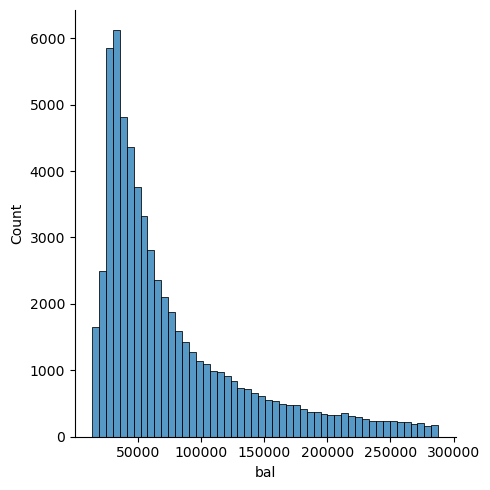

In [171]:
sns.displot(data=clients_wo_bal_outliers, x="bal", bins = 50)
plt.show()

In [173]:
quantiles_bal = clients['bal'].quantile([0.1,0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.98])
quantiles_bal

0.10     27588.080
0.20     33784.040
0.30     41503.080
0.40     50864.610
0.50     63336.890
0.60     82293.110
0.70    114423.140
0.80    171452.110
0.90    319382.040
0.95    524860.005
0.98    911723.960
Name: bal, dtype: float64

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '<25k$'),
  Text(1, 0, '25-50k$'),
  Text(2, 0, '50-100K$'),
  Text(3, 0, '100-250K$'),
  Text(4, 0, '250-500K$'),
  Text(5, 0, '500K$-1M$'),
  Text(6, 0, '>1M$')])

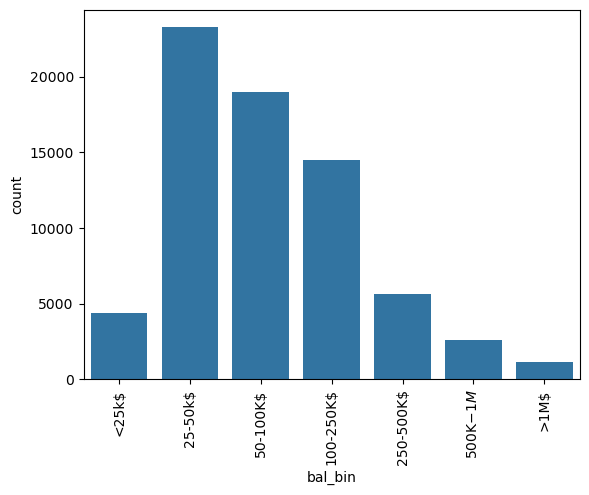

In [174]:
sns.countplot(data=clients, x='bal_bin')
plt.xticks(rotation=90)

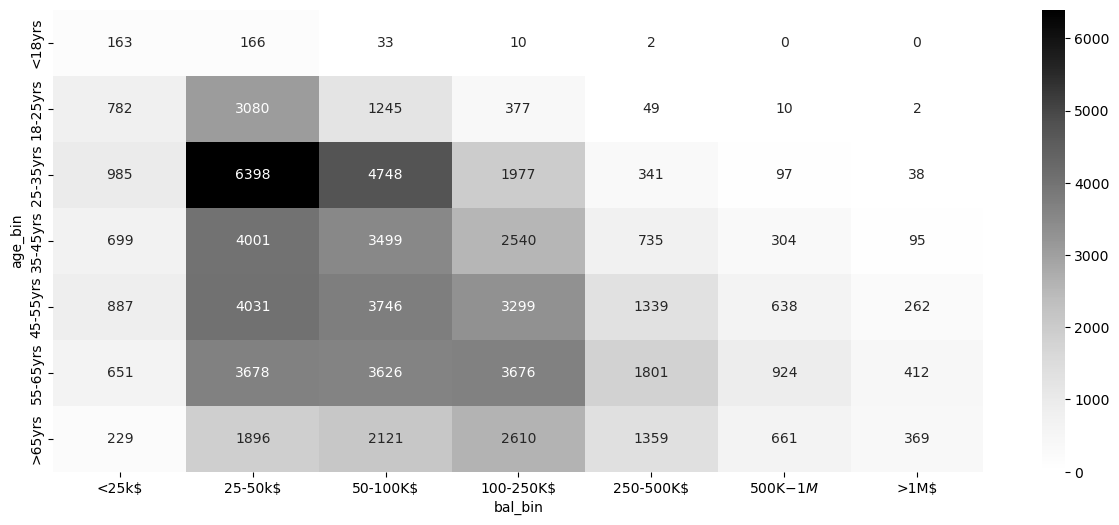

In [195]:
cross_age_bal = pd.crosstab(clients['age_bin'], clients['bal_bin'])
f, ax = plt.subplots(figsize=(15,6))
sns.heatmap(data=cross_age_bal, annot=True, fmt="d", cmap='Greys')
plt.show()

## Additional Insights on the Variation: 



/Users/pierremenard/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


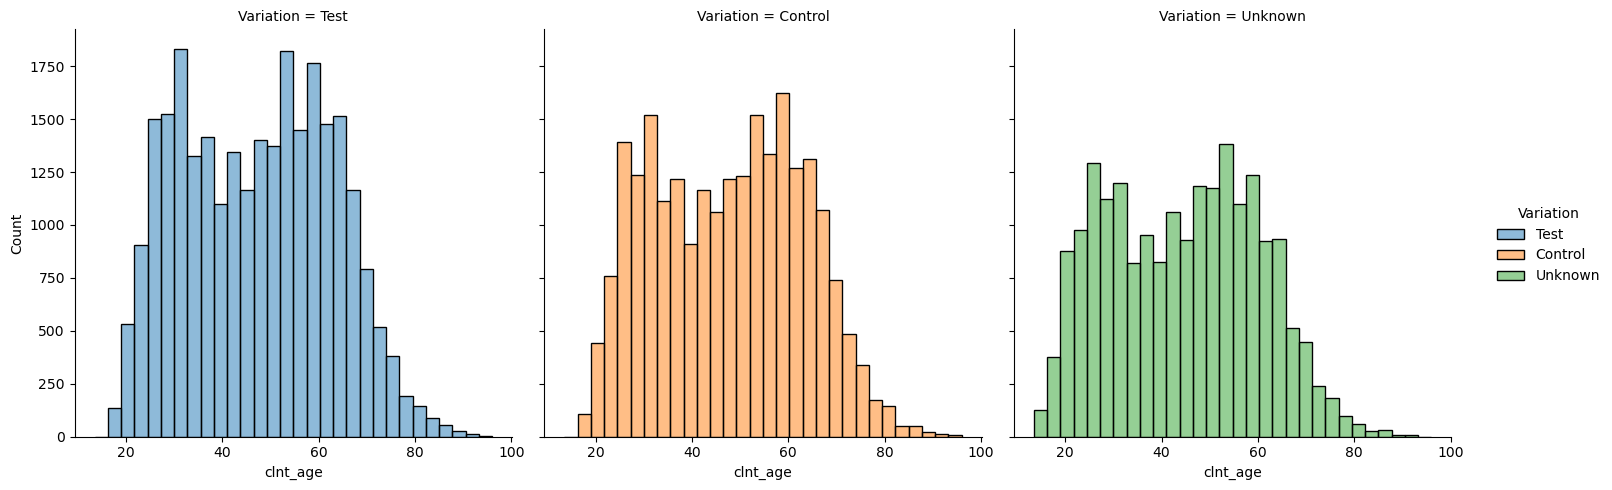

In [178]:
sns.displot(data=clients, x="clnt_age", hue="Variation", col="Variation", bins=30)
plt.show()

/Users/pierremenard/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


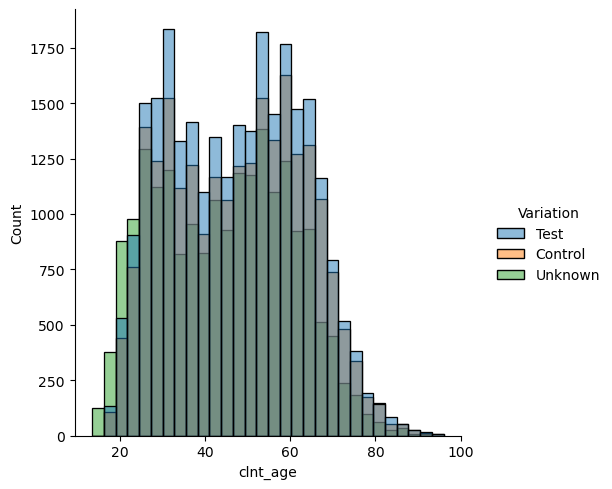

In [179]:
sns.displot(data=clients, x="clnt_age", hue="Variation", multiple="layer", bins=30, alpha=0.5)
plt.show()

/Users/pierremenard/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


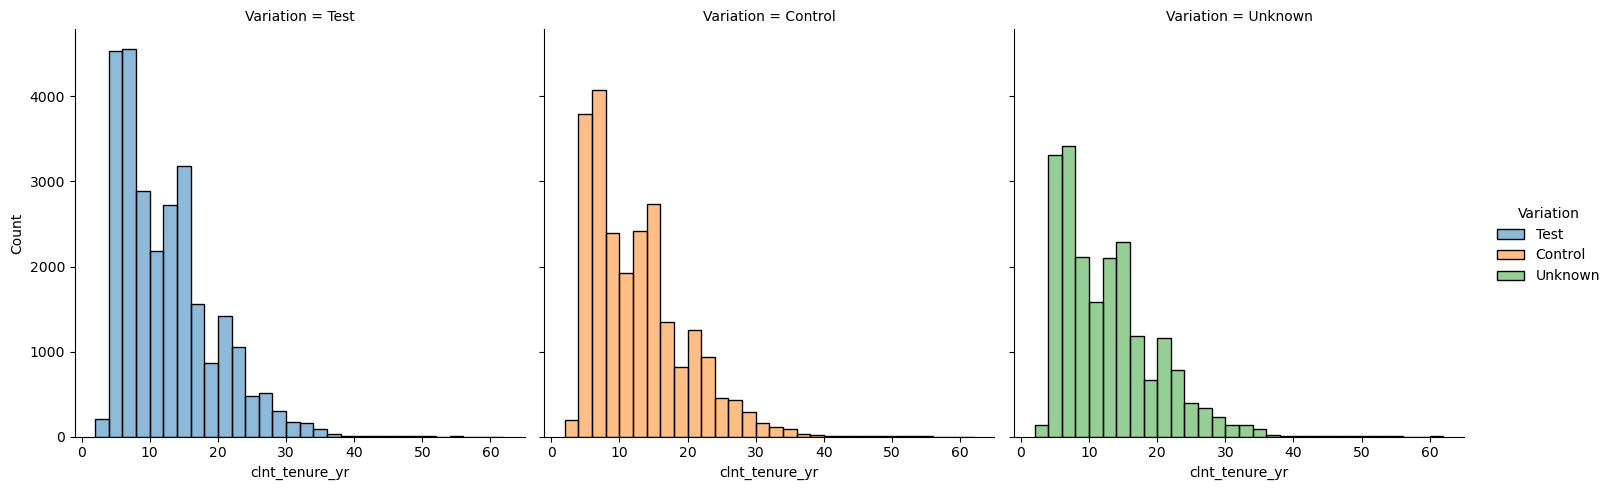

In [180]:
sns.displot(data=clients, x="clnt_tenure_yr", hue="Variation", col="Variation", bins=30)
plt.show()

/Users/pierremenard/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


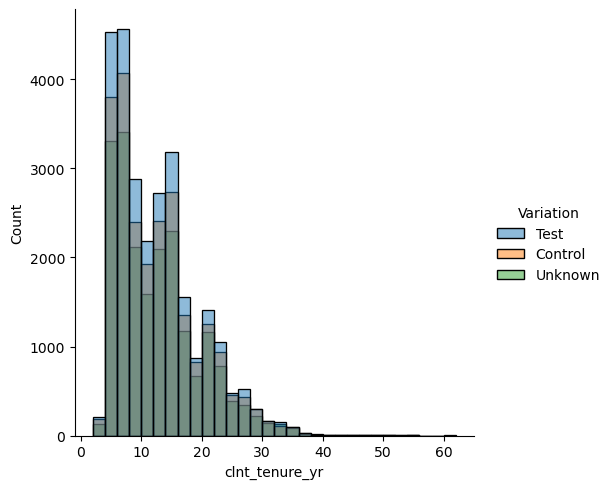

In [181]:
sns.displot(data=clients, x="clnt_tenure_yr", hue="Variation", multiple="layer", bins=30, alpha=0.5)
plt.show()

/Users/pierremenard/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


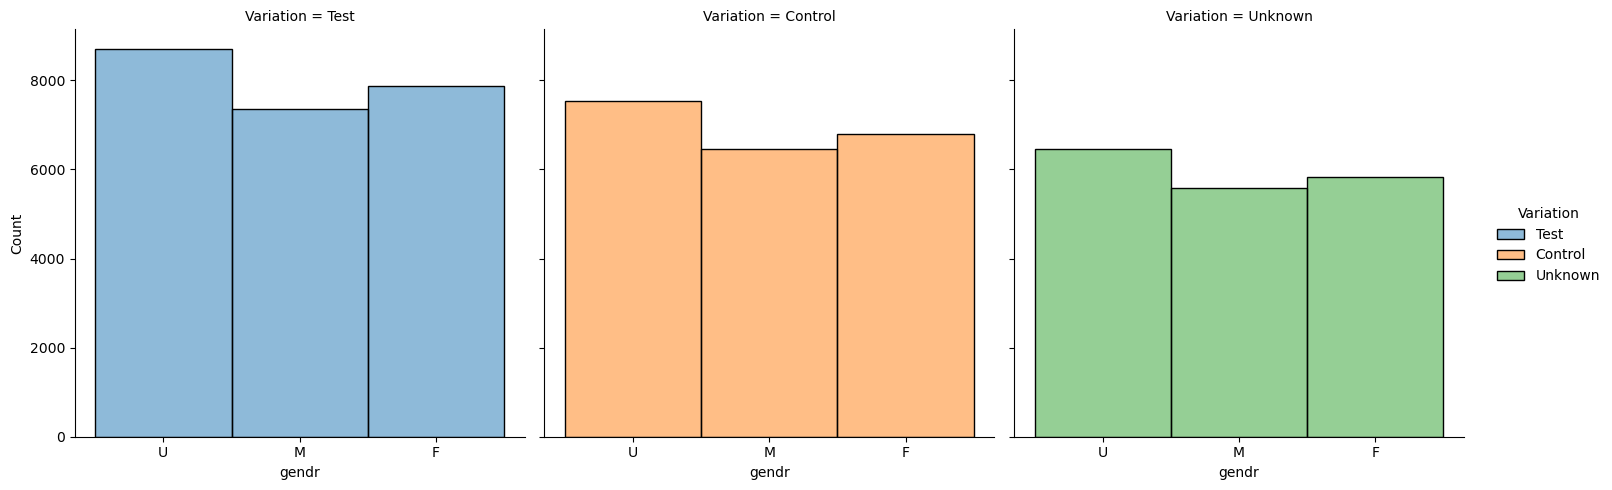

In [182]:
sns.displot(data=clients_wo_bal_outliers, x="gendr", hue = "Variation", col="Variation")
plt.show()

/Users/pierremenard/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


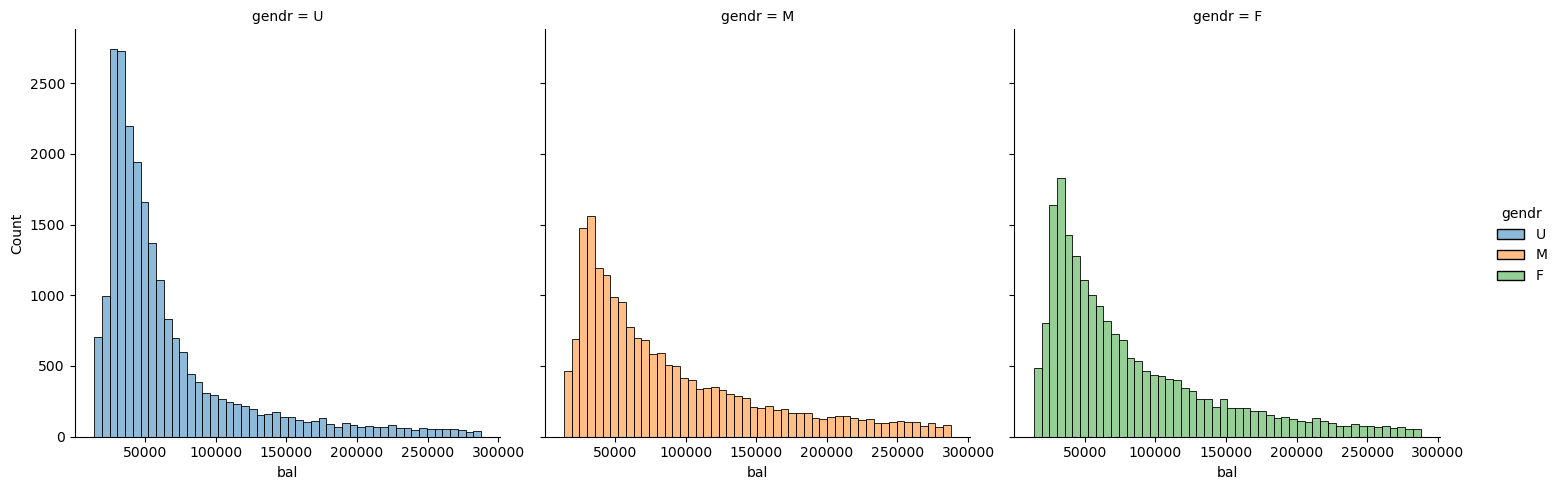

In [183]:
sns.displot(data=clients_wo_bal_outliers, x="bal", hue = "gendr", col="gendr",bins = 50)
plt.show()

/Users/pierremenard/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


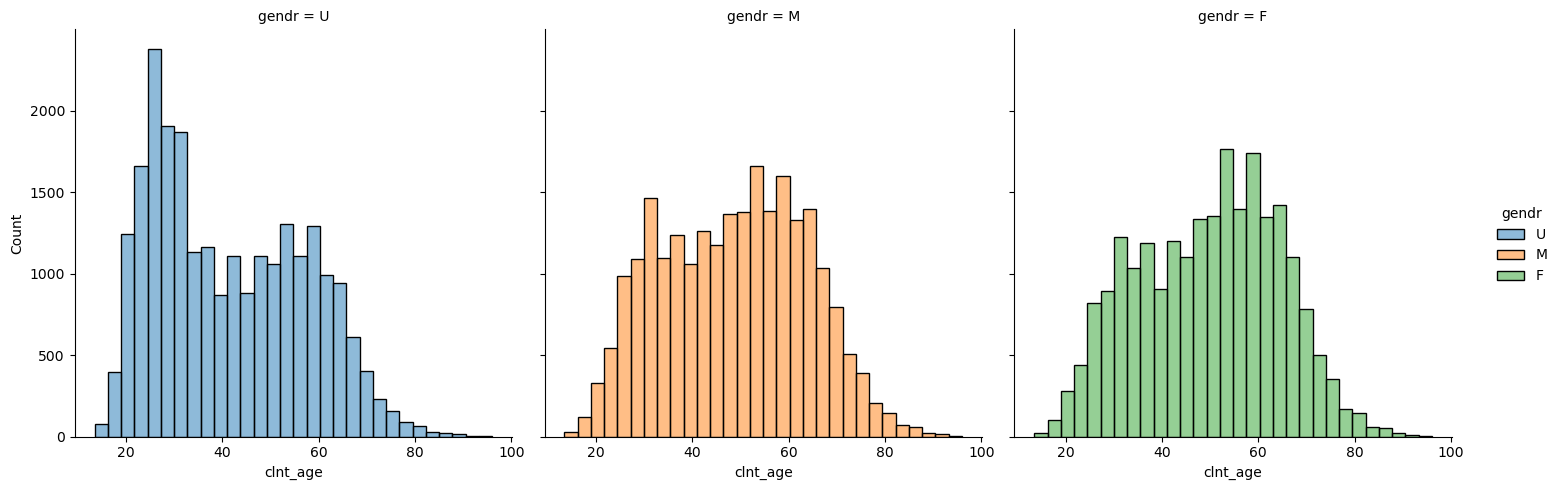

In [184]:
sns.displot(data=clients, x="clnt_age", hue="gendr", col="gendr", bins=30)
plt.show()

/Users/pierremenard/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


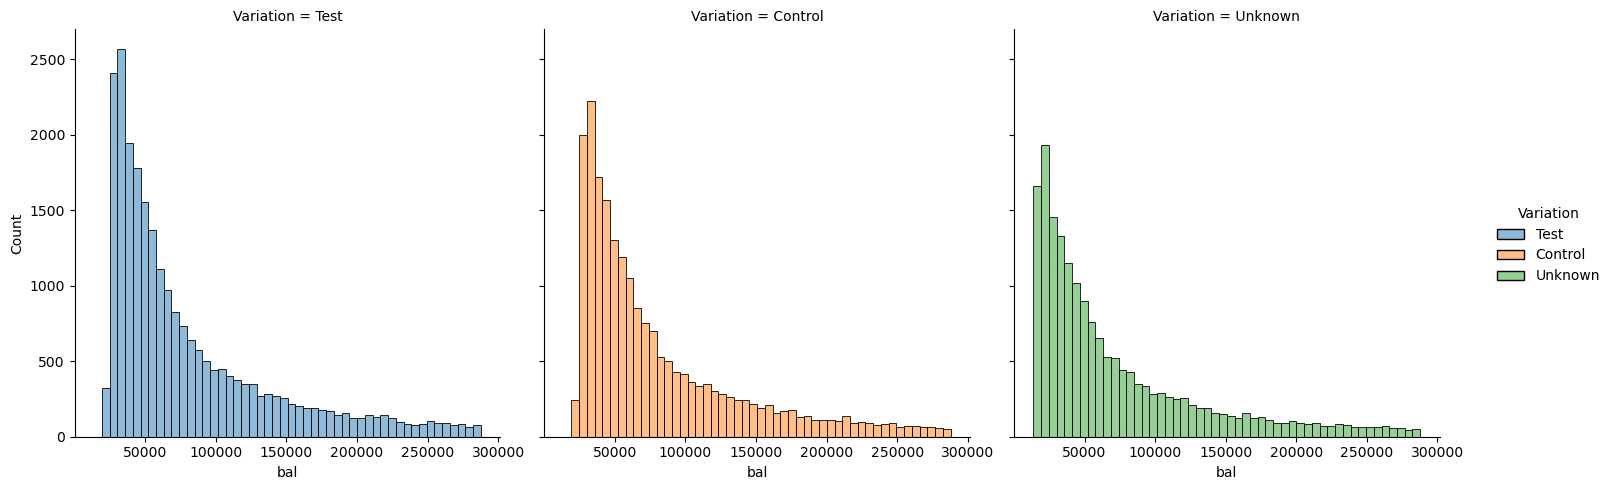

In [185]:
sns.displot(data=clients_wo_bal_outliers, x="bal", hue = "Variation", col="Variation",bins = 50)
plt.show()

/Users/pierremenard/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


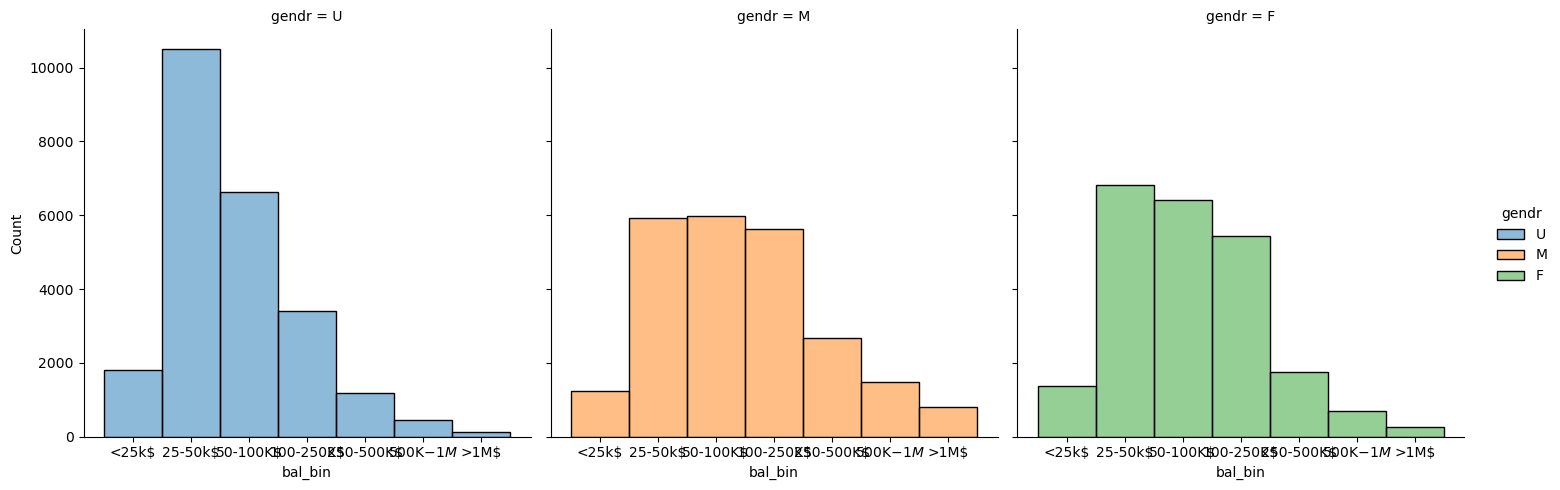

In [186]:
sns.displot(data=clients, x="bal_bin", hue = "gendr", col="gendr")
plt.show()

/Users/pierremenard/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


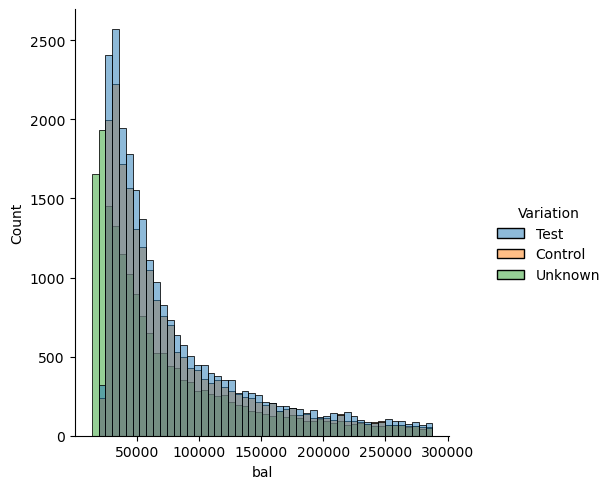

In [190]:
sns.displot(data=clients_wo_bal_outliers, x="bal", hue = "Variation", multiple="layer", bins=50, alpha=0.5)
plt.show()

In [ ]:
sns.displot(data=clients, x="bal_bin", hue = "Variation", col="Variation")
plt.show()

/Users/pierremenard/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


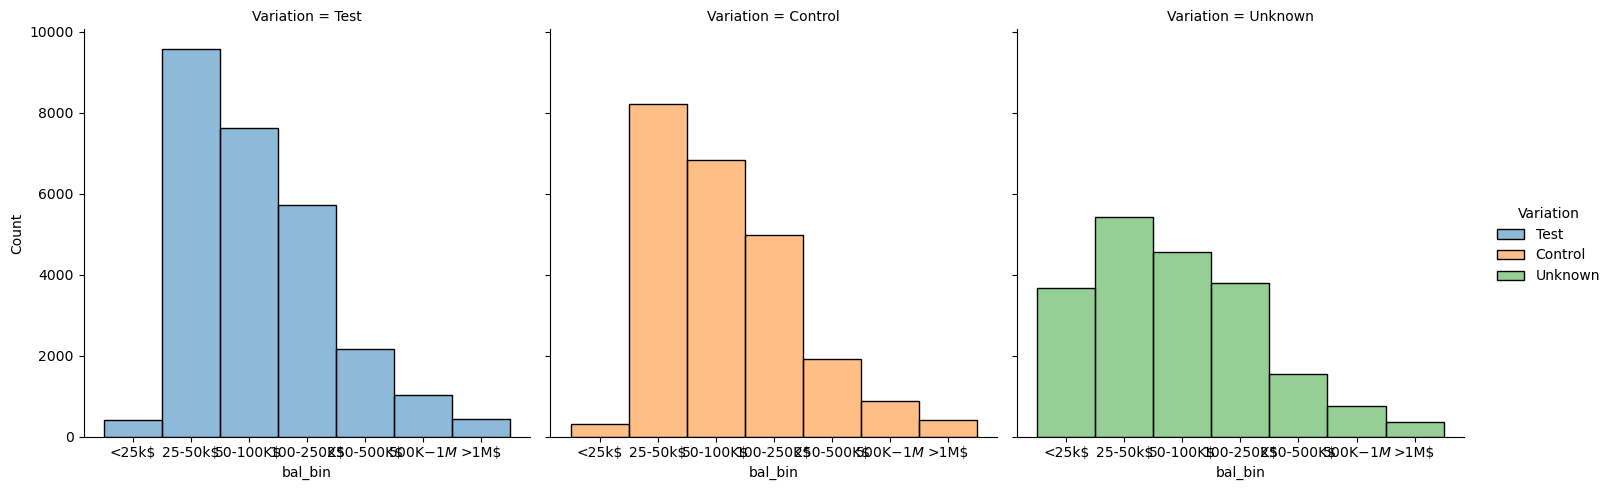

In [200]:
sns.displot(data=clients, x="bal_bin", hue = "Variation", col="Variation")
plt.show()